# Fit MRP parameters to data in the form a traditional mass function curve

In this example, we do something very simple -- fit the MRP parameters using a theoretically produced HMF. This might be one of the first things you'd want to do with the MRP. In addition to the simple fit, we'll also change the truncation scale, to see how the fit performs over different mass ranges. Furthermore, we'll change the redshift and halo overdensity to make sure the fit performs well in all cases.

**The resulting plot appears as figure 1 in MRP**

In [71]:
#Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from mrpy import get_fit_curve

#We'll use the hmf package to produce the theoretical HMF
from hmf import MassFunction
from hmf.cosmo import Planck13

First, we produce a *hmf* model consistent with the Planck 2013 data, and resolved enough to produce a high-quality fit:

In [3]:
hmf = MassFunction(hmf_model="Tinker08",Mmin=10,Mmax=15,lnk_min=-13,lnk_max=13,
                   dlnk=0.01, transfer_params={"transfer__kmax":50.0},
                   sigma_8=0.829,n=0.9603,dlog10m=0.1,cosmo_model=Planck13)

Here's the important part: actually fitting the data.

In [96]:
# Create the lists that we'll use to save the results
res = [0]*64
obj = [0]*64
max_dev = np.zeros(64)
rms_dev = np.zeros(64)
# 4 different truncation masses
mmins = [1e10,1e11,1e12,1e13]
deltahs = [200.0,400.0,800.0,1600.0]
zs = [0.0,0.5,1.0,2.0]

ii = 0
for i,z in enumerate(zs):
    for j,deltah in enumerate(deltahs):
        hmf.update(z=z,delta_h=deltah)
        
        for k,mmin in enumerate(mmins): 
            # Get theoretical data
            dndm = hmf.dndm[hmf.M > mmin]
            m = hmf.M[hmf.M>mmin]

            # Fit the MRP in the *simplest* way possible.
            res[ii], obj[ii] = get_fit_curve(m,dndm,alpha_bounds=(-2.5,-1.3))
            
            max_dev[ii] = np.abs(obj[ii].dndm()/dndm-1).max()
            rms_dev[ii] = np.sqrt(np.mean((obj[ii].dndm()/dndm-1)**2))
            print z, deltah, "%1.0e : "%mmin, res[ii].x, max_dev[ii], rms_dev[ii] # the actual result values
            ii += 1

0.0 200.0 1e+10 :  [ 14.45616516  -1.87089493   0.75332974 -43.40400528] 0.024266504695 0.00946722989195
0.0 200.0 1e+11 :  [ 14.42180148  -1.86164375   0.72118837 -43.16066618] 0.0101750749309 0.00381023452956
0.0 200.0 1e+12 :  [ 14.39500641  -1.85318415   0.70059793 -42.97622676] 0.002323967148 0.000827150492366
0.0 200.0 1e+13 :  [ 14.38491379  -1.84933372   0.69403905 -42.90810013] 0.00032025672955 0.000156378823405
0.0 400.0 1e+10 :  [ 14.36930621  -1.88757643   0.73500854 -43.1718519 ] 0.0198196386707 0.00772272396425
0.0 400.0 1e+11 :  [ 14.340689    -1.87978782   0.71152912 -42.97241138] 0.00830420666509 0.00307415777735
0.0 400.0 1e+12 :  [ 14.31952977  -1.87289913   0.69678282 -42.82778457] 0.0017673028562 0.000618373922307
0.0 400.0 1e+13 :  [ 14.31395001  -1.87075591   0.69334644 -42.79009972] 0.000407662409643 0.000206485533369
0.0 800.0 1e+10 :  [ 14.27871051  -1.90988817   0.73304501 -42.99140741] 0.0146620887512 0.00588929616449
0.0 800.0 1e+11 :  [ 14.25817239  -1.903

Next the boring stuff... setting up and plotting the figure.

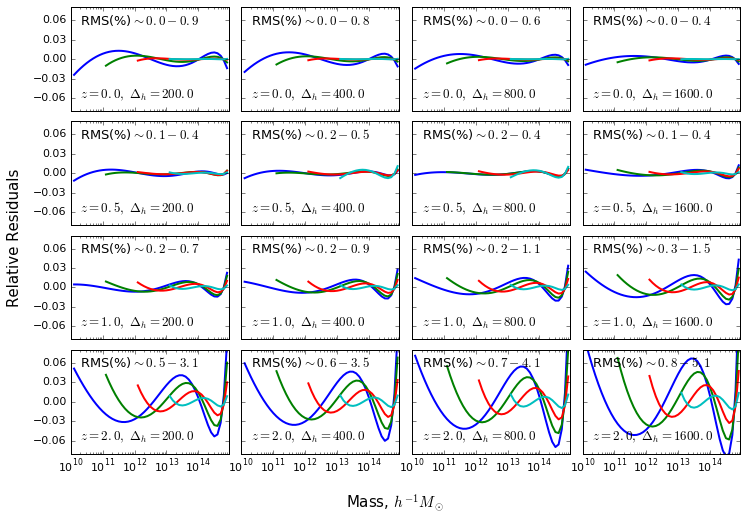

In [100]:
# Create the figure object
fig,ax = plt.subplots(4,4,sharex=True,sharey=True,squeeze=True,figsize=(12,8),
                      subplot_kw={"xscale":"log","ylim":(-0.08,0.08),"xlim":(1e10,9e14)})

# Contract the space a bit
plt.subplots_adjust(wspace=0.08,hspace=0.10)
    
# Plot the fitted data.
# Note that 'obj' contains lots of quantities of interest, not least of which is a method
# to calculate dn/dm!
ii = 0
for i,z in enumerate(zs):
    for j,deltah in enumerate(deltahs):
        ax[i,j].text(2e10,0.053, "RMS(%)" + r"$\sim %1.1f - %1.1f$"%(rms_dev[ii:ii+4].min()*100,rms_dev[ii:ii+4].max()*100),fontsize=13)
        ax[i,j].text(2e10,-0.06,r"$z=%s,\ \Delta_h=%s$"%(z,deltah),fontsize=13)
        
        for k,mmin in enumerate(mmins):
            # Plot each iteration
            ax[i,j].plot(obj[ii].m,obj[ii].dndm()/obj[ii].mw_data-1,lw=2,label=label)
            
            # Modify the ticks for prettiness
            ax[i,j].tick_params(axis='both', which='major', labelsize=11)
            ax[i,j].tick_params(axis='both', which='major', labelsize=11)
            ax[i,j].yaxis.set_major_locator(MaxNLocator(6))
            
            
            
            ii += 1
       
fig.text(0.5, 0.04, r"Mass, $h^{-1}M_\odot$",fontsize=15, ha='center', va='center')
fig.text(0.06, 0.5, 'Relative Residuals', fontsize=15,ha='center', va='center', rotation='vertical')

#Save for the paper!
fig.savefig("../../../mrpArticle/figures/comparison_tinker.pdf")